In [1]:
import matplotlib.pyplot as plt
import numpy as np
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P

In [2]:
# 1. Date de intrare (Exemplu: ani până la defectare observați în teste)
date_defectiuni = [1.2, 2.5, 3.8, 4.1, 5.2, 5.8, 6.5, 7.2, 8.1, 9.5]

In [3]:
# 2. Fităm distribuția Weibull pe datele noastre
# Aceasta ne va da parametrii Alpha (viața caracteristică) și Beta (forma)
model = Fit_Weibull_2P(failures=date_defectiuni, show_probability_plot=False)
alpha = model.alpha
beta = model.beta

print(f"Parametrul de formă (Beta): {beta:.2f}")
print(f"Viața caracteristică (Alpha): {alpha:.2f} ani")

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 10/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         6.07528        0.846244   4.62381   7.98239
     Beta         2.37931        0.619694   1.42809   3.96413 

Goodness of fit    Value
 Log-likelihood -22.9633
           AICc  51.6409
            BIC  50.5318
             AD  1.37357 

Parametrul de formă (Beta): 2.38
Viața caracteristică (Alpha): 6.08 ani


In [4]:
# 3. Definirea scenariului de business
numar_vehicule = 10000
cost_mediu_reparatie = 450  # Euro
perioada_garantie = 5  # ani

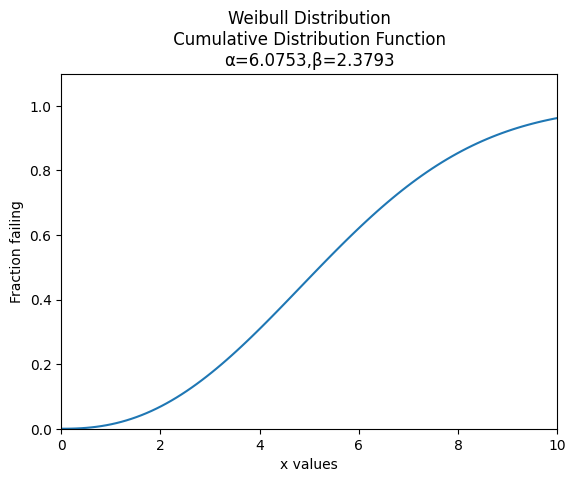

In [5]:
# 4. Calculul costurilor pe termen lung
ani = np.linspace(0, 10, 100)
dist = Weibull_Distribution(alpha=alpha, beta=beta)

# CDF (Cumulative Distribution Function) ne dă probabilitatea de defectare până la momentul t
probabilitate_defectare = dist.CDF(ani)
unitati_defecte_estimate = probabilitate_defectare * numar_vehicule
costuri_estimate = unitati_defecte_estimate * cost_mediu_reparatie

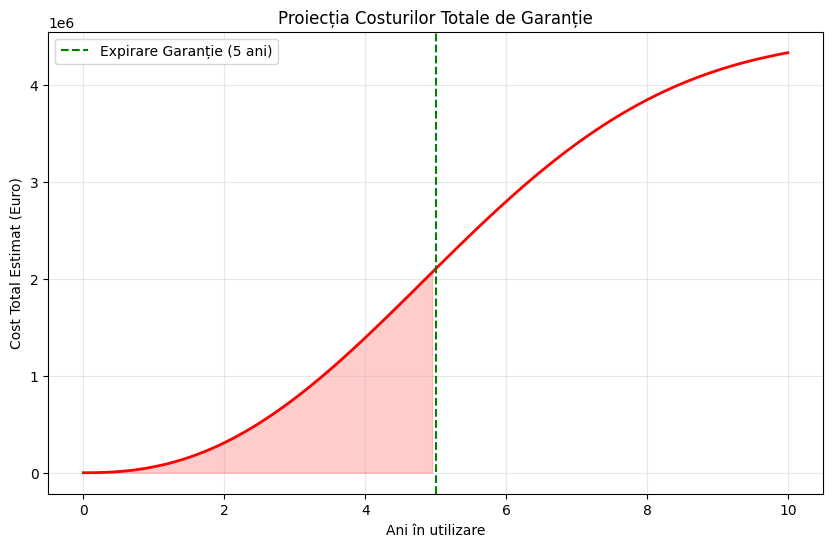

Cost total estimat pentru garanție (5 ani): 2,101,176.49 Euro


In [6]:
# 5. Vizualizarea rezultatelor
plt.figure(figsize=(10, 6))
plt.plot(ani, costuri_estimate, color='red', linewidth=2)
plt.axvline(x=perioada_garantie, color='green', linestyle='--', label='Expirare Garanție (5 ani)')
plt.fill_between(ani, costuri_estimate, where=(ani <= perioada_garantie), color='red', alpha=0.2)

plt.title('Proiecția Costurilor Totale de Garanție')
plt.xlabel('Ani în utilizare')
plt.ylabel('Cost Total Estimat (Euro)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calcul exact pentru perioada de garanție
cost_garantie = dist.CDF(perioada_garantie) * numar_vehicule * cost_mediu_reparatie
print(f"Cost total estimat pentru garanție (5 ani): {cost_garantie:,.2f} Euro")

#Explicația Modelului Matematic
Folosim funcția de distribuție cumulativă (CDF) a modelului Weibull:
$$F(t) = 1 - e^{-(t/\alpha)^\beta}$$
Unde:$t$: Timpul (anii de garanție).
$\beta$ (Beta): Dacă $\beta < 1$, avem defecte de fabricație. Dacă $\beta > 1$ (ca în exemplul nostru), avem defecte cauzate de uzură (wear-out).
$\alpha$ (Alpha): Punctul în care $63.2\%$ din unități au cedat deja.
#De ce este util acest studiu în inginerie?
Provizionare Financiară: Compania știe exact câți bani să blocheze în conturi pentru a acoperi reparațiile viitoare.
Optimizarea Designului: Dacă $\beta$ este foarte mare, înseamnă că piesele cedează brusc după un anumit timp. Inginerii pot decide să folosească materiale mai bune pentru a "împinge" curba spre dreapta.
Strategia de Service: Poți decide dacă este mai ieftin să reparam piesa când se strică sau să facem o rechemare în service (recall) preventivă.